<a href="https://colab.research.google.com/github/EddyGiusepe/Confusion_Matrix_to_ML_DL/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>Everything you Should Know about Confusion Matrix for Machine Learning</h2> 


**Cientista de Dados Jr.:**  Dr.Eddy Giusepe Chirinos Isidro

# <font color="orange">Exemplo simples sobre como obter a Matriz de confusão</font>

Neste exemplo, simples, implementamos a nossa ``Matriz de Confusão`` com Dados dentro de uma lista. 

In [3]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [4]:
# actual values
actual = [1,0,0,1,0,0,1,0,0,1]
# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]


In [5]:
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n', matrix)

#obs:
# VP = 2
# VN = 5
# FP = 1
# FN = 2 


Confusion matrix : 
 [[2 2]
 [1 5]]


In [6]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)


Outcome values : 
 2 2 1 5


In [7]:
# Também: caso binário, podemos extrair verdadeiros positivos, etc. da seguinte forma:
tn, fpr, fn, tpr = confusion_matrix(actual, predicted).ravel()

(tn, fpr, fn, tpr)

(5, 1, 2, 2)

In [8]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual, predicted, labels = [1,0])

print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           0       0.71      0.83      0.77         6

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



# <font color="orange">Exemplo com Dados de Dígitos para obter a nossa Matriz de Confusão</font>

Neste, segundo exemplo, usaremos um conjunto de Dados de Dígitos de Manuscritos do ``scikit-learn``. Cada feature deste conjunto de Dados é uma ``imagem de 8x8 pixels`` de um número manuscrito. ``Digits.data`` converte esses $64$ pixels em uma única matriz de features. Aqui temos dígitos do $0$ até $9$.


Estudar o seguinte link para mais detalhes:

* [Regressão logística usando Python (scikit-learn)](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a)

In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Importamos nossos Dados

In [10]:
digits = load_digits()
X = digits.data
y = digits.target


In [11]:
X.shape

(1797, 64)

In [12]:
y.shape

(1797,)

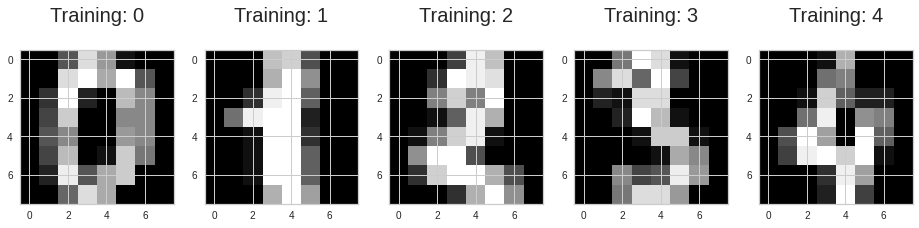

In [13]:
# podemos visualizar os dígitos:

plt.figure(figsize=(16,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

In [14]:
# DataFrame de nossas features 

X_DataFrame =pd.DataFrame(X)
X_DataFrame.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,14.0,0.0,0.0,0.0,0.0,13.0,16.0,15.0,10.0,1.0,0.0,0.0,0.0,11.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,9.0,0.0,0.0,0.0,5.0,4.0,12.0,16.0,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0


In [15]:
# DataFrame de nossa Target

y_DataFrame =pd.DataFrame(y)
y_DataFrame.sample(7)

,0
616,4
1556,1
1658,9
21,1
320,4
1424,9
482,8


Dividimos nossos Dados em Dados de Treino e Dados de Teste

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=11)


Como sabemos, no ``sklearn`` todos os modelos de aprendizado de máquina são implementados como classes Python. A seguir instanciamos nosso modelo (``Regressão Logística``).

In [17]:
model = LogisticRegression(multi_class="auto", solver="liblinear")


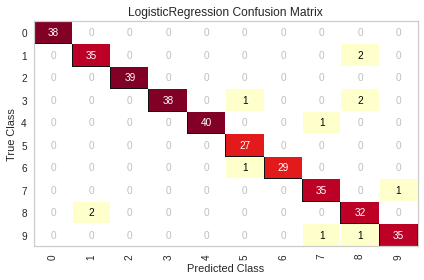

In [18]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

# O fit se ajusta ao modelo passado. Isso é desnecessário se você passar ao visualizador um modelo pré-ajustado
cm.fit(X_train, y_train)

# Para criar o ConfusionMatrix, precisamos de alguns dados de teste. O score executa o predict() nos dados e, em seguida, cria o confusion_matrix do scikit-learn.
cm.score(X_test, y_test)

cm.show()


In [19]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [20]:
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [21]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))

array([0])

In [22]:
logisticRegr.predict(X_test[0:10])

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0])

In [23]:
predictions = logisticRegr.predict(X_test)
predictions

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 8, 6, 9, 5,
       0, 6, 9, 3, 2, 1, 8, 1, 7, 0, 4, 4, 1, 5, 3, 0, 5, 9, 3, 9, 6, 5,
       5, 8, 8, 1, 1, 2, 4, 9, 5, 6, 9, 2, 1, 8, 5, 3, 2, 7, 9, 6, 3, 7,
       4, 2, 0, 1, 0, 2, 7, 3, 5, 1, 8, 7, 7, 2, 0, 6, 6, 4, 6, 8, 3, 7,
       4, 1, 9, 3, 5, 4, 0, 3, 8, 3, 3, 1, 2, 8, 5, 0, 1, 7, 2, 1, 3, 3,
       7, 4, 0, 2, 9, 0, 4, 2, 5, 6, 1, 2, 6, 1, 5, 6, 0, 2, 6, 2, 6, 1,
       9, 4, 9, 0, 4, 0, 2, 3, 4, 4, 1, 7, 8, 7, 2, 0, 3, 7, 8, 8, 3, 5,
       4, 3, 5, 4, 9, 1, 3, 7, 8, 1, 1, 6, 7, 3, 8, 9, 9, 0, 6, 1, 0, 1,
       0, 7, 6, 1, 5, 9, 0, 2, 2, 8, 6, 8, 3, 2, 9, 2, 9, 3, 0, 1, 2, 7,
       4, 9, 9, 7, 9, 3, 2, 7, 2, 6, 9, 8, 0, 2, 6, 3, 4, 2, 7, 6, 6, 7,
       7, 6, 0, 7, 6, 6, 0, 7, 1, 4, 4, 1, 0, 9, 4, 0, 4, 2, 4, 6, 5, 3,
       8, 4, 1, 3, 9, 8, 3, 8, 9, 4, 2, 0, 4, 9, 2, 3, 5, 0, 8, 2, 5, 4,
       7, 5, 5, 1, 0, 2, 9, 0, 7, 7, 6, 2, 1, 5, 4, 1, 0, 5, 1, 6, 5, 4,
       8, 7, 5, 9, 0, 2, 2, 8, 4, 4, 8, 8, 8, 5, 3,

In [28]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print("A nossa score é: {:0.2f}".format(score))

A nossa score é: 0.97


In [25]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  2  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  3  0]
 [ 0  0  0  0 40  0  0  1  0  0]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  1 29  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  0  0  0  0  1  0  1 31  1]
 [ 0  0  0  0  0  0  0  0  1 36]]


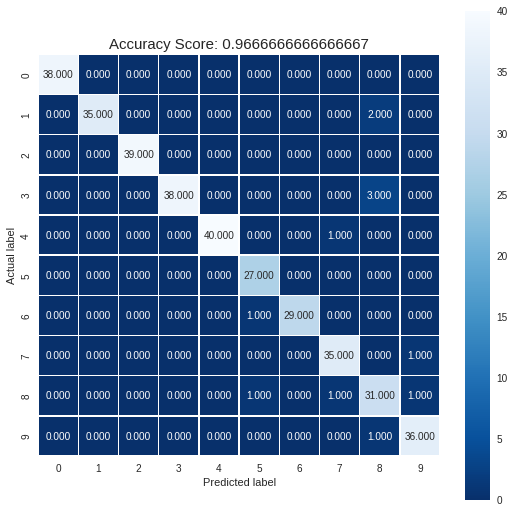

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

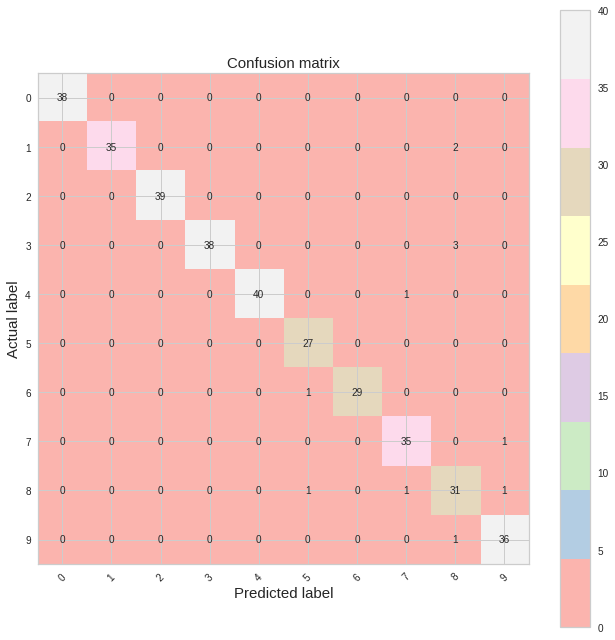

In [27]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)

width, height = cm.shape
for x in range(width):
  for y in range(height):
    plt.annotate(str(cm[x][y]), xy=(y, x), 
    horizontalalignment='center',
    verticalalignment='center')